
## Exploratory Data Analysis (EDA)

a. EDA helps to gain valuable hints for Data Cleaning (which can make or break models).
b. EDA helps to think of ideas for Feature Engineering (which can take the model from good to great).
c. Get a "feel" for the dataset, which will helps to communicate results and deliver greater business impact.

1. Basic Information
2. Distributions of numeric values
3. Distributions of categorical features
4. Segmentations
5. Correlations

In [3]:
#Load all libraries
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 100)

from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns

In [4]:
#load real estate data from csv

df = pd.read_csv('project_files/real_estate_data.csv')

## Basic Information

In [6]:
#dimensions
df.shape

(1883, 26)

In [7]:
#data types
#Check if any numeric features should be categorical instead.
#Or (more commonly), check if any categorical features should be numeric instead.
#If a data dictionary is provided, that's a great place to check. Use it to check if any columns were imported as incorrect data types.
#It's fine if you are unsure about some columns, as we'll continue to explore them.

df.dtypes

tx_price                int64
beds                    int64
baths                   int64
sqft                    int64
year_built              int64
lot_size                int64
property_type          object
exterior_walls         object
roof                   object
basement              float64
restaurants             int64
groceries               int64
nightlife               int64
cafes                   int64
shopping                int64
arts_entertainment      int64
beauty_spas             int64
active_life             int64
median_age            float64
married               float64
college_grad          float64
property_tax          float64
insurance             float64
median_school         float64
num_schools           float64
tx_year                 int64
dtype: object

In [13]:
# Object type variables
df.dtypes[df.dtypes == 'object']

property_type     object
exterior_walls    object
roof              object
dtype: object

In [17]:
# Object type variable names
for name in df.dtypes[df.dtypes == 'object'].index:
    print(name)

property_type
exterior_walls
roof


In [18]:
# Sample data

#Gives a qualitative "feel" for the dataset.

#Do the columns make sense?
#Do the values in those columns make sense?
#Are the values on the right scale?
#Is missing data going to be a big problem based on a quick eyeball test?
#What types of classes are there in the categorical features?

df.head(10)

,tx_price,beds,baths,sqft,year_built,lot_size,property_type,exterior_walls,roof,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year
0,295850,1,1,584,2013,0,Apartment / Condo / Townhouse,Wood Siding,NaN,NaN,107,9,30,19,89,6,47,58,33.0,65.0,84.0,234.0,81.0,9.0,3.0,2013
1,216500,1,1,612,1965,0,Apartment / Condo / Townhouse,Brick,Composition Shingle,1.0,105,15,6,13,87,2,26,14,39.0,73.0,69.0,169.0,51.0,3.0,3.0,2006
2,279900,1,1,615,1963,0,Apartment / Condo / Townhouse,Wood Siding,NaN,NaN,183,13,31,30,101,10,74,62,28.0,15.0,86.0,216.0,74.0,8.0,3.0,2012
3,379900,1,1,618,2000,33541,Apartment / Condo / Townhouse,Wood Siding,NaN,NaN,198,9,38,25,127,11,72,83,36.0,25.0,91.0,265.0,92.0,9.0,3.0,2005
4,340000,1,1,634,1992,0,Apartment / Condo / Townhouse,Brick,NaN,NaN,149,7,22,20,83,10,50,73,37.0,20.0,75.0,88.0,30.0,9.0,3.0,2002
5,265000,1,1,641,1947,0,Apartment / Condo / Townhouse,Brick,NaN,NaN,146,10,23,27,86,9,60,52,28.0,15.0,86.0,168.0,58.0,8.0,3.0,2004
6,240000,1,1,642,1944,0,Single-Family,Brick,NaN,NaN,159,13,36,17,92,12,66,50,28.0,36.0,88.0,176.0,61.0,7.0,3.0,2011
7,388100,1,1,650,2000,33541,Apartment / Condo / Townhouse,Wood Siding,NaN,NaN,198,9,38,25,127,11,72,83,36.0,25.0,91.0,266.0,92.0,9.0,3.0,2005
8,240000,1,1,660,1983,0,Apartment / Condo / Townhouse,Brick,NaN,NaN,51,8,6,2,40,18,32,41,36.0,49.0,77.0,188.0,65.0,6.0,3.0,2013
9,250000,1,1,664,1965,0,Apartment / Condo / Townhouse,Brick,NaN,NaN,119,10,26,25,183,13,70,36,57.0,13.0,83.0,147.0,51.0,6.0,3.0,2007


In [19]:
# Last 5 rows
df.tail()

,tx_price,beds,baths,sqft,year_built,lot_size,property_type,exterior_walls,roof,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year
1878,385000,5,6,6381,2004,224334,Single-Family,Stucco,Composition Shingle,1.0,0,0,0,0,3,0,0,1,46.0,76.0,87.0,1250.0,381.0,10.0,3.0,2002
1879,690000,5,6,6501,1956,23086,Single-Family,Brick,Composition Shingle,1.0,45,7,5,7,41,3,61,11,42.0,73.0,61.0,1553.0,473.0,9.0,3.0,2015
1880,600000,5,6,7064,1995,217800,Single-Family,Metal,Composition Shingle,1.0,5,1,1,1,8,2,1,2,43.0,87.0,66.0,942.0,287.0,8.0,1.0,1999
1881,759900,5,6,7500,2006,8886,Single-Family,Siding (Alum/Vinyl),Asphalt,1.0,18,2,4,0,5,1,8,6,43.0,61.0,51.0,803.0,245.0,5.0,2.0,2009
1882,735000,5,6,7515,1958,10497,Single-Family,Brick,Composition Shingle,1.0,0,0,0,1,2,2,0,5,37.0,80.0,86.0,1459.0,444.0,9.0,3.0,2015


## Distributions of numeric values

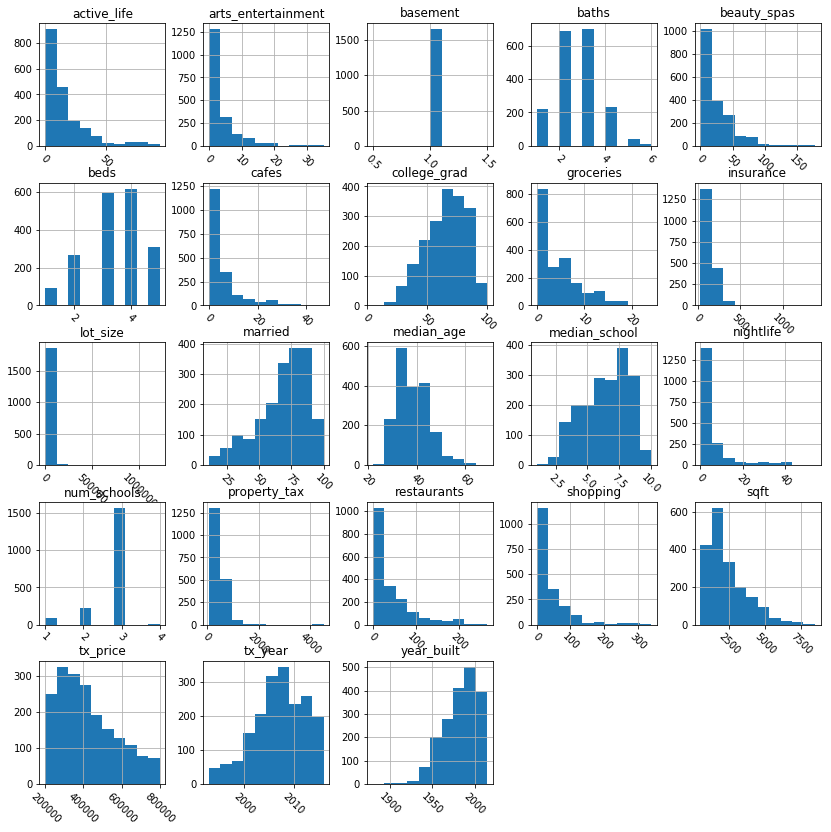

In [42]:
#Distributions that are unexpected (e.g a large spike in houses with 10 bedrooms)
#Potential outliers that don't make sense
#Sparse data 
#Features that should be binary
#Boundaries that don't make sense (e.g.percent married of above 100 or below 0)
#Potential measurement errors 
                              
# Numeric feature distribution
# Histogram grid

df.hist(figsize=(14,14), xrot=-45)

plt.show() # used to clear all of the text "residue" and just keep the plot

In [26]:
# Summmary Statistics Numerical features
df.describe()

,tx_price,beds,baths,sqft,year_built,lot_size,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year
count,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1.883000e+03,1657.0,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000
mean,422839.807754,3.420605,2.579926,2329.398832,1982.963887,1.339262e+04,1.0,40.210303,4.505045,5.074881,5.325013,40.802443,3.394052,23.416888,15.835369,38.601168,69.091875,65.085502,466.777483,140.454063,6.502921,2.793415,2007.111524
std,151462.593276,1.068554,0.945576,1336.991858,20.295945,4.494930e+04,0.0,46.867012,4.491029,8.464668,7.539309,53.539296,4.699787,25.776916,17.667717,6.634110,19.659767,16.953165,231.656645,72.929765,1.996109,0.505358,5.196898
min,200000.000000,1.000000,1.000000,500.000000,1880.000000,0.000000e+00,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,11.000000,5.000000,88.000000,30.000000,1.000000,1.000000,1993.000000
25%,300000.000000,3.000000,2.000000,1345.000000,1970.000000,1.542000e+03,1.0,7.000000,1.000000,0.000000,0.000000,6.000000,0.000000,4.000000,4.000000,33.000000,58.000000,54.000000,320.000000,94.000000,5.000000,3.000000,2004.000000
50%,392000.000000,3.000000,3.000000,1907.000000,1986.000000,6.098000e+03,1.0,23.000000,3.000000,2.000000,3.000000,22.000000,2.000000,15.000000,10.000000,38.000000,73.000000,66.000000,426.000000,125.000000,7.000000,3.000000,2007.000000
75%,525000.000000,4.000000,3.000000,3005.000000,2000.000000,1.176100e+04,1.0,58.000000,7.000000,6.000000,6.000000,51.000000,5.000000,35.000000,21.000000,43.000000,84.000000,78.000000,569.000000,169.000000,8.000000,3.000000,2011.000000
max,800000.000000,5.000000,6.000000,8450.000000,2015.000000,1.220551e+06,1.0,266.000000,24.000000,54.000000,47.000000,340.000000,35.000000,177.000000,94.000000,69.000000,100.000000,100.000000,4508.000000,1374.000000,10.000000,4.000000,2016.000000


## Distribution of categorical features

1. Look for Sparse classes

In [27]:
# Summary Statistics categorical features
df.describe(include=['object'])

,property_type,exterior_walls,roof
count,1883,1660,1529
unique,2,16,16
top,Single-Family,Brick,Composition Shingle
freq,1080,687,1179


property_type


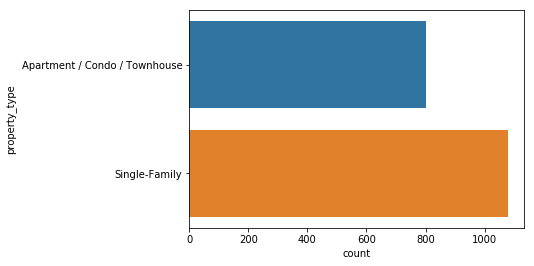

exterior_walls


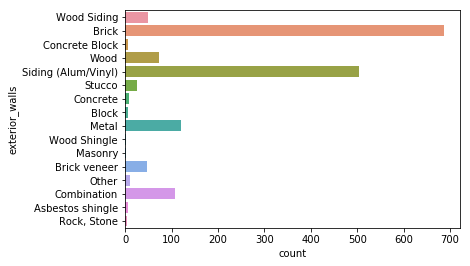

roof


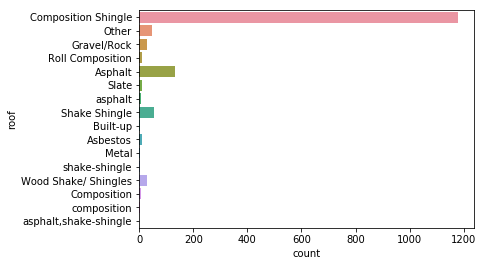

In [48]:
#Barplot / Coutplot of all categorical variables

# 'exterior_walls' and 'roof' suffers from sparse class
for cat_features in df.dtypes[df.dtypes=='object'].index:
    print(cat_features)
    sns.countplot(y=cat_features, data=df)
    plt.show()

## Segmentations

1. Way to cut the data to observe the relationship between categorical features and numeric features.

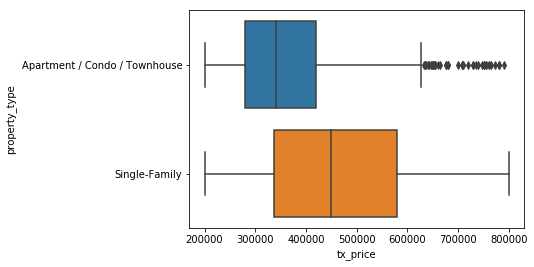

In [49]:
#Boxplot
# Segment tx_price by property_type and plot distributions
sns.boxplot(y='property_type', x='tx_price', data=df)

In [77]:
# Segment by property_type and display the mean, standard deviation within each class

#On average, which type of property is larger?
#Which type of property is has larger lots?
#Which type of property is in areas with more nightlife options/more restaurants/more grocery stores?
#Do these relationships make intuitive sense, or are any surprising to you?

#df.groupby('property_type').mean()
df.groupby('property_type').agg(['mean', 'std'])

tx_price                     beds  \
                                        mean            std      mean   
property_type                                                           
Apartment / Condo / Townhouse  366614.034869  121784.490486  2.601494   
Single-Family                  464644.711111  157758.739013  4.029630   

                                            baths                   sqft  \
                                    std      mean       std         mean   
property_type                                                              
Apartment / Condo / Townhouse  0.810220  2.200498  0.815009  1513.727273   
Single-Family                  0.795639  2.862037  0.937551  2935.865741   

                                             year_built             \
                                       std         mean        std   
property_type                                                        
Apartment / Condo / Townhouse   556.286650  1988.936488  15.513640   
Single-Family                  1422.871169  1978.523148  22.210582   

                                   lot_size               basement       \
                                       mean           std     mean  std   
property_type                                                             
Apartment / Condo / Townhouse   3944.239103  44284.168767      1.0  0.0   
Single-Family                  20417.666667  44165.529302      1.0  0.0   

                              restaurants            groceries            \
                                     mean        std      mean       std   
property_type                                                              
Apartment / Condo / Townhouse   58.418431  54.343594  5.919054  4.645774   
Single-Family                   26.672222  34.726416  3.453704  4.067285   

                              nightlife                cafes            \
                                   mean        std      mean       std   
property_type                                                            
Apartment / Condo / Townhouse  7.855542  10.643816  8.037360  9.077038   
Single-Family                  3.007407   5.543822  3.308333  5.325053   

                                shopping            arts_entertainment  \
                                    mean        std               mean   
property_type                                                            
Apartment / Condo / Townhouse  57.631382  61.852299           4.840598   
Single-Family                  28.289815  42.292313           2.318519   

                                        beauty_spas            active_life  \
                                    std        mean        std        mean   
property_type                                                                
Apartment / Condo / Townhouse  5.234834   32.087173  26.910443   22.410959   
Single-Family                  3.929691   16.970370  22.872112   10.946296   

                                         median_age              married  \
                                     std       mean       std       mean   
property_type                                                              
Apartment / Condo / Townhouse  21.058178  37.199253  6.906584  57.534247   
Single-Family                  12.599296  39.643519  6.225732  77.685185   

                                         college_grad            property_tax  \
                                     std         mean        std         mean   
property_type                                                                   
Apartment / Condo / Townhouse  20.372706    66.372354  17.095874   346.261519   
Single-Family                  13.868205    64.128704  16.790347   556.383333   

                                            insurance             \
                                      std        mean        std   
property_type                                                      
Apartment / Condo / Townhouse  142.292282  105.652553  47

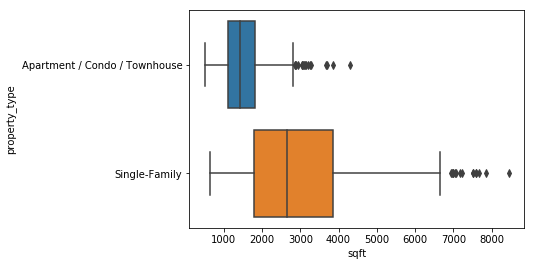

In [51]:
# Segment sqft by sqft and property_type distributions

#Which type of property is larger, on average?
#Which type of property sees greater variance in sizes?
#Does the difference in distributions between classes make intuitive sense?


sns.boxplot(y='property_type', x='sqft', data=df)

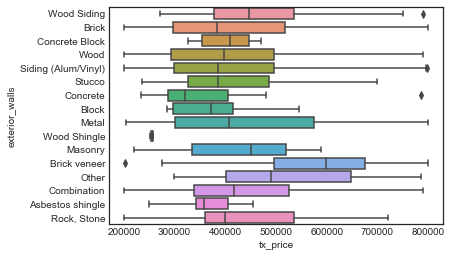

In [74]:
# Segment tx_price by exterior_walls and plot distributions
sns.boxplot(y='exterior_walls', x='tx_price', data=df)

In [80]:
df.groupby('exterior_walls').mean()

,tx_price,beds,baths,sqft,year_built,lot_size,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year
exterior_walls,,,,,,,,,,,,,,,,,,,,,,,
Asbestos shingle,363430.000000,3.666667,1.666667,1653.666667,1946.000000,9765.500000,1.0,71.500000,6.833333,8.500000,10.833333,107.666667,5.000000,37.500000,18.000000,35.500000,74.166667,52.500000,444.666667,140.166667,5.500000,3.000000,2011.166667
Block,375609.571429,2.285714,2.142857,2043.857143,1997.571429,9956.428571,1.0,53.571429,9.857143,3.571429,9.714286,25.857143,8.571429,36.857143,21.428571,36.000000,55.428571,66.000000,493.714286,150.285714,5.714286,3.000000,2007.428571
Brick,417601.874818,3.157205,2.371179,1940.253275,1975.694323,10598.129549,1.0,53.177584,6.027656,7.168850,7.622999,56.599709,4.708879,30.944687,19.924309,39.921397,62.528384,67.687045,462.778748,143.649199,6.231441,2.867540,2007.072780
Brick veneer,573275.208333,3.583333,2.895833,2576.270833,1954.833333,7911.187500,1.0,72.166667,7.104167,10.666667,9.979167,63.125000,7.583333,33.729167,35.583333,39.958333,65.875000,78.854167,701.937500,243.312500,7.812500,3.000000,2005.708333
Combination,438498.140187,4.149533,3.196262,3611.224299,1994.532710,32685.084112,1.0,16.766355,2.065421,1.691589,1.925234,16.523364,1.205607,11.570093,6.214953,38.906542,81.112150,55.196262,469.205607,134.485981,6.948598,2.700935,2006.728972
Concrete,386125.000000,2.625000,2.000000,1418.625000,1961.250000,2052.500000,1.0,121.000000,6.625000,19.875000,21.625000,215.250000,8.750000,75.000000,44.500000,46.000000,60.125000,73.875000,445.875000,146.375000,8.750000,3.000000,2008.500000
Concrete Block,401436.428571,1.428571,1.285714,835.000000,2005.000000,25510.142857,NaN,166.142857,8.285714,28.428571,23.000000,102.142857,10.000000,59.714286,78.857143,27.857143,18.428571,88.857143,301.571429,104.000000,9.000000,3.000000,2008.571429
Masonry,419333.333333,2.666667,1.666667,1764.666667,2005.666667,380.000000,1.0,65.333333,8.000000,11.333333,9.333333,52.666667,3.333333,36.000000,24.666667,36.666667,39.333333,51.333333,361.000000,119.333333,2.000000,3.000000,2010.333333
Metal,443991.108333,3.608333,2.733333,2583.291667,1985.916667,13543.075000,1.0,27.533333,3.433333,2.625000,3.191667,25.783333,1.841667,16.733333,9.891667,39.433333,75.575000,67.591667,504.775000,153.550000,7.033333,2.700000,2005.875000


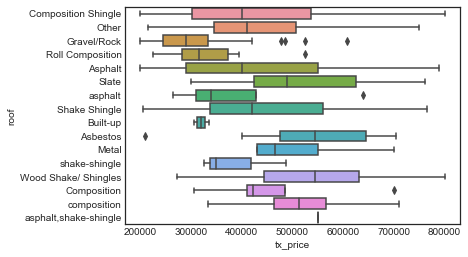

In [81]:
# Segment tx_price by roof and plot distributions
sns.boxplot(y='roof', x='tx_price', data=df)

In [82]:
df.groupby('roof').mean()

,tx_price,beds,baths,sqft,year_built,lot_size,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year
roof,,,,,,,,,,,,,,,,,,,,,,,
Asbestos,522114.333333,3.888889,2.555556,3395.444444,1969.777778,34071.222222,1.0,15.888889,2.444444,1.222222,2.333333,15.111111,3.333333,10.333333,11.111111,39.888889,78.888889,62.222222,644.888889,198.000000,6.388889,2.666667,2005.111111
Asphalt,428134.621212,3.689394,2.848485,2667.265152,1980.378788,14991.439394,1.0,34.992424,4.318182,4.590909,4.575758,38.037879,4.022727,22.825758,15.030303,38.893939,73.303030,60.840909,490.939394,145.545455,5.655303,2.765152,2006.712121
Built-up,320054.500000,2.500000,3.000000,1413.500000,1973.000000,925.000000,1.0,100.500000,4.500000,11.500000,15.500000,169.500000,11.000000,52.500000,38.500000,52.000000,51.000000,69.000000,342.000000,104.000000,8.500000,3.000000,2009.000000
Composition,464454.400000,3.800000,3.000000,2778.400000,1986.400000,5162.200000,1.0,61.600000,7.800000,7.800000,7.400000,63.800000,4.600000,36.600000,21.200000,43.400000,64.800000,70.800000,643.600000,203.000000,6.000000,2.800000,2003.400000
Composition Shingle,430104.691264,3.593723,2.656489,2403.730280,1982.932994,11298.592027,1.0,31.002545,3.952502,3.045802,3.787956,33.764207,2.260390,18.962680,11.642070,38.604750,72.929601,65.409669,486.807464,145.362171,6.656064,2.776081,2007.043257
Gravel/Rock,313834.633333,2.166667,1.800000,1247.533333,1979.966667,1293.166667,1.0,73.000000,8.966667,10.266667,12.566667,94.966667,5.500000,49.100000,20.766667,48.233333,43.633333,67.900000,302.600000,91.966667,6.000000,3.000000,2008.033333
Metal,515000.000000,3.750000,2.500000,1449.000000,1955.750000,6640.250000,1.0,33.250000,4.500000,3.250000,3.250000,40.000000,1.500000,21.000000,17.750000,43.750000,71.000000,82.000000,767.000000,228.750000,7.750000,3.000000,2009.500000
Other,441730.428571,3.489796,2.714286,2638.877551,1986.142857,14865.000000,1.0,45.367347,3.795918,4.938776,6.061224,56.142857,3.795918,28.959184,17.571429,39.918367,67.102041,69.367347,540.285714,161.714286,7.173469,2.816327,2006.448980
Roll Composition,333230.583333,1.750000,1.583333,1039.250000,1973.750000,799.666667,1.0,92.250000,9.583333,13.166667,17.000000,95.416667,13.583333,69.333333,42.750000,37.500000,44.750000,58.750000,367.750000,117.500000,4.333333,3.000000,2009.250000


## Correlations

In [55]:
# correlations between numeric features

correlations = df.corr()

In [56]:
# correlations for 'basement' all show as NaN.
#This is expected because the feature doesn't vary at all (its standard deviation is 0)

correlations

,tx_price,beds,baths,sqft,year_built,lot_size,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year
tx_price,1.000000,0.384046,0.389375,0.469573,0.033138,0.130558,NaN,-0.038027,-0.094314,0.009361,-0.001398,-0.038246,-0.021076,-0.054349,-0.001165,0.126335,0.200494,0.268577,0.535148,0.532947,0.175762,-0.014380,0.108782
beds,0.384046,1.000000,0.644572,0.691039,-0.011844,0.164399,NaN,-0.495834,-0.421412,-0.440844,-0.464289,-0.388670,-0.442168,-0.419832,-0.486957,0.133711,0.643240,-0.082354,0.547643,0.485776,0.137309,-0.124359,-0.174081
baths,0.389375,0.644572,1.000000,0.682060,0.206141,0.132976,NaN,-0.350210,-0.340024,-0.306686,-0.316836,-0.259603,-0.305885,-0.282008,-0.329736,0.095844,0.442225,0.016097,0.525776,0.475430,0.163365,-0.088299,-0.132110
sqft,0.469573,0.691039,0.682060,1.000000,0.254589,0.246016,NaN,-0.353759,-0.371167,-0.281540,-0.300969,-0.275586,-0.293402,-0.310465,-0.332663,0.109811,0.480167,0.065343,0.660264,0.594049,0.220669,-0.102032,-0.236190
year_built,0.033138,-0.011844,0.206141,0.254589,1.000000,0.000068,NaN,-0.106948,-0.222443,-0.080006,-0.102209,-0.121684,-0.195141,-0.163670,-0.134919,-0.237152,0.038208,-0.014204,-0.046504,-0.109521,0.155835,-0.188106,-0.043301
lot_size,0.130558,0.164399,0.132976,0.246016,0.000068,1.000000,NaN,-0.113887,-0.118574,-0.072224,-0.098182,-0.116560,-0.067189,-0.121075,-0.092668,0.099140,0.122028,-0.030725,0.165800,0.146579,0.096551,-0.031535,-0.048207
basement,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
restaurants,-0.038027,-0.495834,-0.350210,-0.353759,-0.106948,-0.113887,NaN,1.000000,0.701462,0.926675,0.937616,0.818815,0.726907,0.867829,0.881799,-0.063816,-0.615584,0.214260,-0.100821,-0.019925,-0.068425,0.251171,0.044739
groceries,-0.094314,-0.421412,-0.340024,-0.371167,-0.222443,-0.118574,NaN,0.701462,1.000000,0.565003,0.602857,0.526356,0.502837,0.626850,0.574532,-0.022377,-0.508793,-0.006025,-0.159506,-0.093974,-0.354553,0.272856,0.115674
nightlife,0.009361,-0.440844,-0.306686,-0.281540,-0.080006,-0.072224,NaN,0.926675,0.565003,1.000000,0.923901,0.743321,0.703038,0.777461,0.858836,-0.028611,-0.568811,0.253717,-0.054386,0.024551,-0.036948,0.196399,0.027495


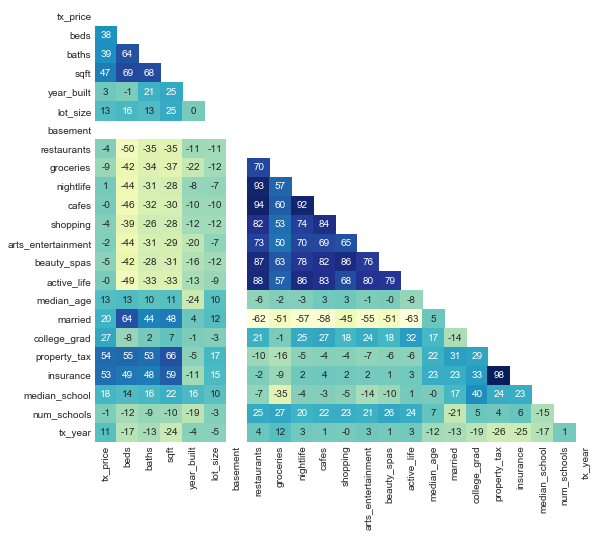

In [73]:
# Correlation heatmap

# Generate a mask for the upper triangle
mask = np.zeros_like(correlations, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.set_style('white')

plt.figure(figsize=(9,8))

sns.heatmap(correlations*100, cmap="YlGnBu", annot=True, fmt = '.0f', mask = mask, cbar = False)